In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

### mnist Dataset

In [2]:
(X_train,y_train),(X_test,y_test) = tensorflow.keras.datasets.mnist.load_data()

In [3]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


Each image is 28x28 pixels

In [4]:
def display_image(examples,labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        idx = np.random.randint(0,examples.shape[0]-1)
        img = examples[idx]
        label = labels[idx]
        
        plt.subplot(5,5,i+1)
        plt.title(str(label))
        plt.tight_layout() # Fix layout
        plt.imshow(img,cmap = 'gray') # cmap is to specify grayscale
    plt.show()

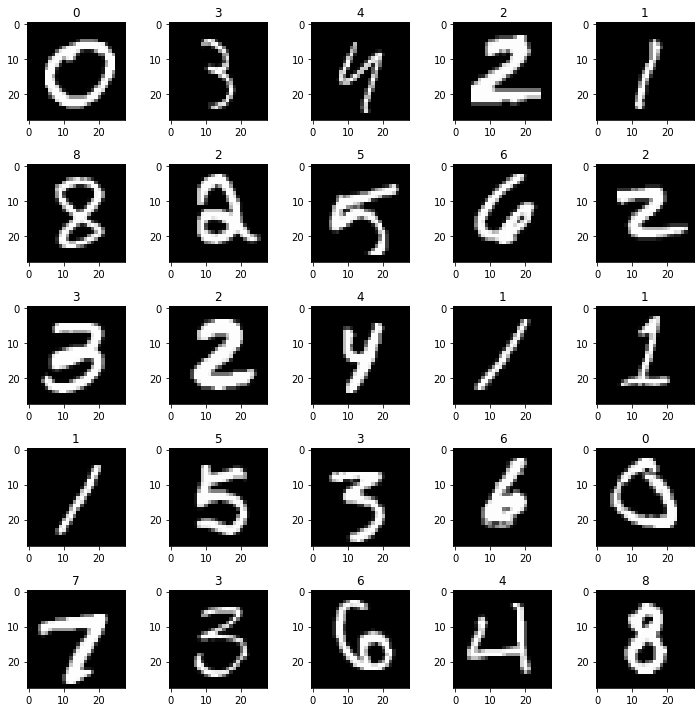

In [5]:
display_image(X_train,y_train)

In [8]:
from tensorflow.keras.layers import Conv2D,Input,MaxPool2D,BatchNormalization,GlobalAvgPool2D,Dense

Three Approaches :
- tensorflow.keras.Sequential
- Functional Approach : function to return a model
- tensorflow.keras.Model : Use this a base model to inherit

In [9]:
# tensorflow.keras.Sequential

model = tensorflow.keras.Sequential([
    Input(shape = (28,28,1)), # Each image is 28px and has one channnel (gray scale)
    Conv2D(32,(3,3),activation = 'relu'), # filters,kernel_size
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPool2D(),
    BatchNormalization(),

    Conv2D(128,(3,3),activation = 'relu'),
    MaxPool2D(),
    BatchNormalization(),
    
    GlobalAvgPool2D(),
    Dense(64,activation = 'relu'), # Units
    Dense(10,activation = 'softmax')
])

In [10]:
# Normalizing Data before passing it to model
X_train = X_train.astype('float32') / 255 # Convert 8 bit to 32 bit & divide by 255(b/w)
X_test = X_test.astype('float32') / 255

X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (60000, 28, 28, 1)
y_train: (60000,)
X_test: (10000, 28, 28, 1)
y_test: (10000,)


Notice, after normalizing we have included the channel required for model

In [14]:
# Model Compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy') # optimizer : global min, loss function,sparse_categorical_crossentropy is used to avoid one hot encoding in y_train/y_test 
# Model Building
model.fit(X_train,y_train,batch_size = 64,epochs= 3,validation_split = 0.2) # epoch is number of passes
# Model Evaluation on test set
model.evaluate(X_test,y_test,batch_size = 64)

Epoch 1/3
750/750 [==============================] - 122s 159ms/step - loss: 0.2291 - accuracy: 0.9396 - val_loss: 0.1446 - val_accuracy: 0.9573
Epoch 2/3
750/750 [==============================] - 114s 152ms/step - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.0586 - val_accuracy: 0.9827
Epoch 3/3
157/157 [==============================] - 7s 47ms/step - loss: 0.0454 - accuracy: 0.9848


[0.04543513059616089, 0.9847999811172485]

In [15]:
# Functional Model Approach

def functional_model():
    my_inp = Input(shape = (28,28,1)) # Each image is 28px and has one channnel (gray scale)
    x = Conv2D(32,(3,3),activation = 'relu')(my_inp) # filters,kernel_size
    x = Conv2D(64,(3,3),activation = 'relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(128,(3,3),activation = 'relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)
    
    x = GlobalAvgPool2D()(x)
    x = Dense(64,activation = 'relu')(x)
    x = Dense(10,activation = 'softmax')(x)
    
    model = tensorflow.keras.Model(inputs = my_inp,outputs=x)
    
    return model

In [16]:
model = functional_model()

In [17]:
# Model Compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy') # optimizer : global min, loss function,sparse_categorical_crossentropy is used to avoid one hot encoding in y_train/y_test 
# Model Building
model.fit(X_train,y_train,batch_size = 64,epochs= 3,validation_split = 0.2) # epoch is number of passes
# Model Evaluation on test set
model.evaluate(X_test,y_test,batch_size = 64)

Epoch 1/3
750/750 [==============================] - 118s 156ms/step - loss: 0.2170 - accuracy: 0.9427 - val_loss: 0.1603 - val_accuracy: 0.9507
Epoch 2/3
750/750 [==============================] - 115s 154ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0850 - val_accuracy: 0.9746
Epoch 3/3
157/157 [==============================] - 7s 42ms/step - loss: 0.0348 - accuracy: 0.9883


[0.03482525795698166, 0.9883000254631042]

In [18]:
# tensorflow.keras.Model : inherit from this class
class MyCustomModel(tensorflow.keras.Model):

    def __init__(self):
        super().__init__()

        self.conv1 = Conv2D(32, (3,3), activation='relu')
        self.conv2 = Conv2D(64, (3,3), activation='relu')
        self.maxpool1 = MaxPool2D()
        self.batchnorm1 = BatchNormalization()

        self.conv3 = Conv2D(128, (3,3), activation='relu')
        self.maxpool2 = MaxPool2D()
        self.batchnorm2 = BatchNormalization()

        self.globalavgpool1 = GlobalAvgPool2D()
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = Dense(10, activation='softmax')  
     

    def call(self, my_input):

        x = self.conv1(my_input)
        x = self.conv2(x)
        x = self.maxpool1(x)
        x = self.batchnorm1(x)
        x = self.conv3(x)
        x = self.maxpool2(x)
        x = self.batchnorm2(x)
        x = self.globalavgpool1(x)
        x = self.dense1(x)
        x = self.dense2(x) 

        return x  

In [19]:
model = MyCustomModel()

In [20]:
# Model Compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy') # optimizer : global min, loss function,sparse_categorical_crossentropy is used to avoid one hot encoding in y_train/y_test 
# Model Building
model.fit(X_train,y_train,batch_size = 64,epochs= 3,validation_split = 0.2) # epoch is number of passes
# Model Evaluation on test set
model.evaluate(X_test,y_test,batch_size = 64)

Epoch 1/3
750/750 [==============================] - 115s 152ms/step - loss: 0.2350 - accuracy: 0.9347 - val_loss: 0.1054 - val_accuracy: 0.9696
Epoch 2/3
750/750 [==============================] - 114s 152ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0744 - val_accuracy: 0.9773
Epoch 3/3
157/157 [==============================] - 7s 43ms/step - loss: 0.0998 - accuracy: 0.9695 


[0.0997500792145729, 0.9695000052452087]